In [1]:
##Estimación de indicadores de seguridad
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang  (1.1.4 -> 1.1.6) [CRAN]
glue   (1.7.0 -> 1.8.0) [CRAN]
cli    (3.6.3 -> 3.6.5) [CRAN]
tibble (3.2.1 -> 3.3.0) [CRAN]


Installing 4 packages: rlang, glue, cli, tibble

Warning message:
"package 'tibble' is in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\Rtmp80G6es\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\Rtmp80G6es\remotes490470bc4796\cpyp-ipdp-funcionespgd-3fffa52/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [2]:
## Pobreza rezago educativo
pob_rez <- openxlsx::read.xlsx("indica_sectei.xlsx", sheet = "p_pob_rezedu") %>%
    intervals(año_base= 2022, "valor", margen = 0.004)
pob_rez

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,23.90000,23.90000,23.90000
2,2023,23.37367,23.46716,23.28055
3,2024,22.85893,23.04217,22.67715
4,2025,22.35553,22.62487,22.08939
5,2026,21.86321,22.21513,21.51687
6,2027,21.38174,21.81281,20.95919
7,2028,20.91086,21.41777,20.41595
8,2029,20.45036,21.02989,19.88680
9,2030,20.00000,20.64903,19.37137


In [3]:
## 15 años y mas rezago educativo
pob_rez_15 <- openxlsx::read.xlsx("indica_sectei.xlsx", sheet = "p_pob15mas_rezedu") %>%
    intervals(año_base= 2024, "valor", margen = 0.004)
pob_rez_15

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,17.000000,17.00000,17.000000
2,2023,16.736098,16.73610,16.736098
3,2024,16.476293,16.47629,16.476293
4,2025,16.220521,16.28540,16.155897
5,2026,15.968719,16.09672,15.841732
6,2027,15.720827,15.91023,15.533676
7,2028,15.476782,15.72590,15.231610
8,2029,15.236526,15.54370,14.935419
9,2030,15.000000,15.36362,14.644987


In [4]:
tasa_inicial<- openxlsx::read.xlsx("indica_sectei.xlsx", sheet = "tasa_co_brut_edu_inicial") %>%
    intervals(año_base= 2023, "valor", margen = 0.004)

tasa_inicial

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,0.4500000,0.4500000,0.4500000
2,2023,0.4972342,0.4972342,0.4972342
3,2024,0.5494262,0.5516239,0.5472373
4,2025,0.6070966,0.6119631,0.6022688
5,2026,0.6708204,0.6789025,0.6628345
6,2027,0.7412329,0.7531640,0.7294908
7,2028,0.8190363,0.8355486,0.8028503
8,2029,0.9050062,0.9269447,0.8835869
9,2030,1.0000000,1.0283382,0.9724427


In [5]:
tasa_mediasup<- openxlsx::read.xlsx("indica_sectei.xlsx", sheet = "tasa_co_brut_edu_mediasup") %>%
    intervals(año_base= 2023, "valor", margen = 0.004)
tasa_mediasup

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,117.3000,117.3000,117.3000
2,2023,117.5112,117.5112,117.5112
3,2024,117.7227,118.1936,117.2537
4,2025,117.9346,118.8800,116.9968
5,2026,118.1469,119.5704,116.7404
6,2027,118.3596,120.2648,116.4847
7,2028,118.5727,120.9632,116.2294
8,2029,118.7862,121.6657,115.9748
9,2030,119.0000,122.3723,115.7207


In [6]:
patentes<- openxlsx::read.xlsx("indica_sectei.xlsx", sheet = "patentes") %>%
    intervals(año_base= 2024, "valor", margen = 0.004)
patentes

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,22.20000,22.20000,22.20000
2,2023,22.53208,22.53208,22.53208
3,2024,22.86913,22.86913,22.86913
4,2025,23.21123,23.30407,23.11875
5,2026,23.55844,23.74728,23.37110
6,2027,23.91084,24.19892,23.62619
7,2028,24.26852,24.65915,23.88407
8,2029,24.63154,25.12813,24.14477
9,2030,25.00000,25.60603,24.40831


In [7]:
snii<- openxlsx::read.xlsx("indica_sectei.xlsx", sheet = "p_inte_snii_acom_stem") %>%
    intervals(año_base= 2024, "valor", margen = 0.004)
snii

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,36.00000,36.00000,36.00000
2,2023,36.47726,36.47726,36.47726
3,2024,36.96084,36.96084,36.96084
4,2025,37.45084,37.60064,37.30163
5,2026,37.94733,38.25152,37.64557
6,2027,38.45041,38.91366,37.99267
7,2028,38.96015,39.58726,38.34297
8,2029,39.47665,40.27253,38.69650
9,2030,40.00000,40.96965,39.05330


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


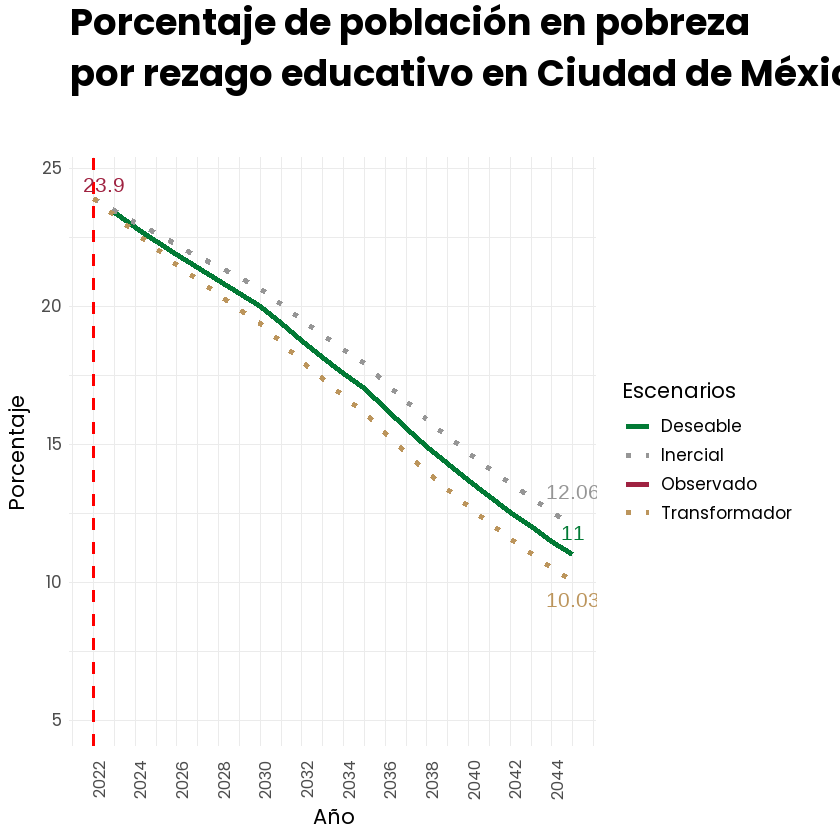

In [8]:
grafica_bonita(
  data = pob_rez,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población en pobreza 
por rezago educativo en Ciudad de México
",
 
    ano_base = 2022,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2022,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(0.5, 0.5),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 5
)

ggsave("H:/Mi unidad/pgd/graficas/pobrezarezedu_estimada.png", width = 10, height = 6, dpi = 185, bg = "white")

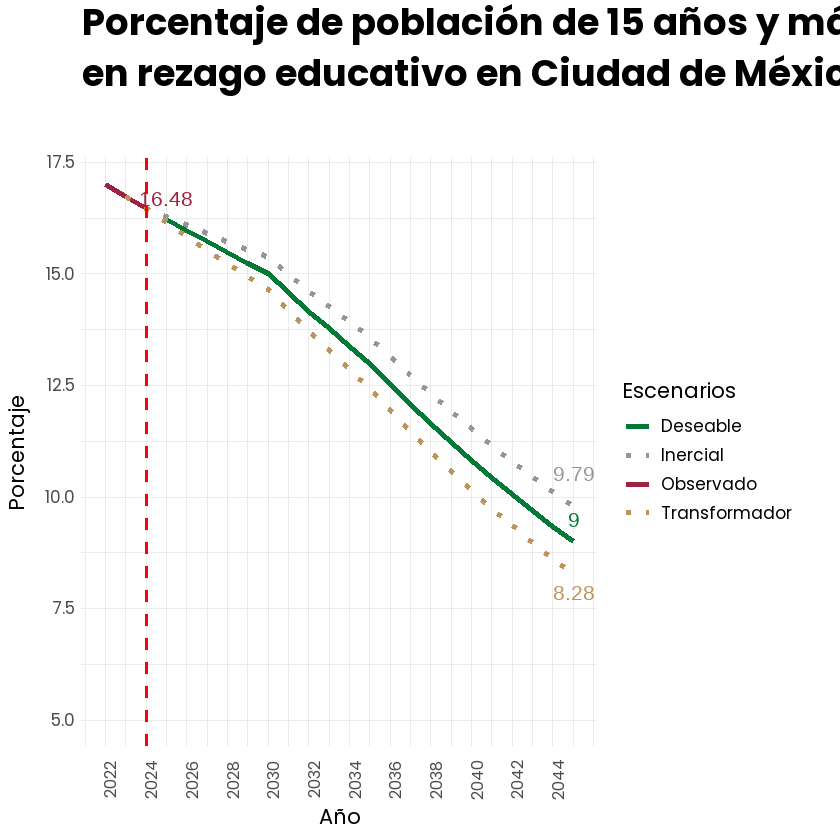

In [9]:
grafica_bonita(
  data = pob_rez_15,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población de 15 años y más
en rezago educativo en Ciudad de México
",
      ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1, 0.2),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 5
)

ggsave("H:/Mi unidad/pgd/graficas/pob_rez_edu15_estimada.png", width = 10, height = 6, dpi = 185, bg = "white")

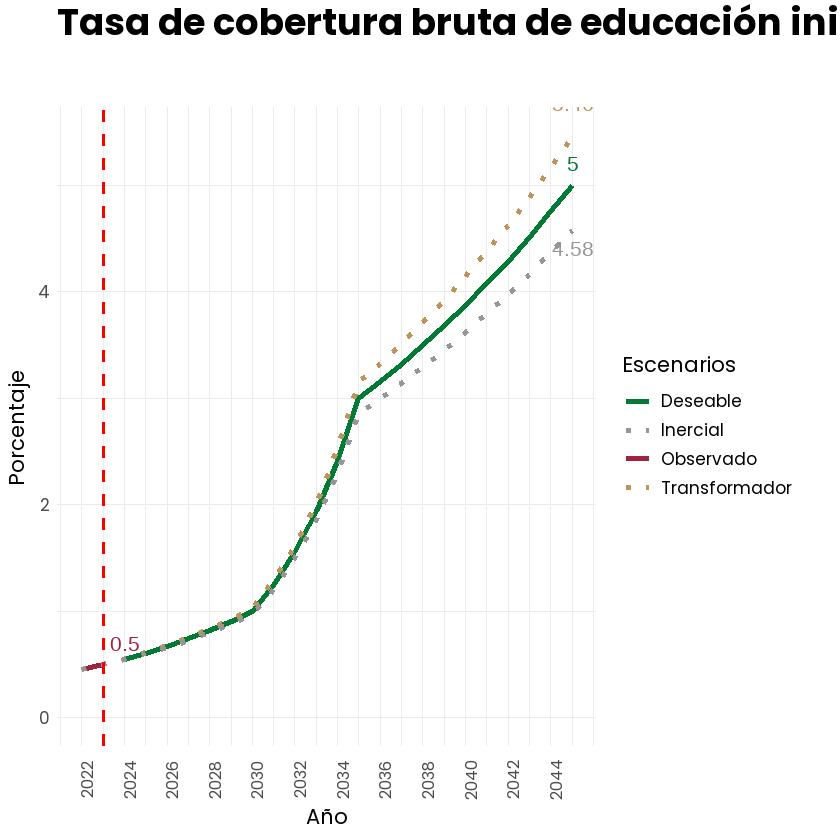

In [10]:
grafica_bonita(
  data = tasa_inicial,
  x = "year",
  y = "estimado",
  titulo = "Tasa de cobertura bruta de educación inicial en la Ciudad de México
",
       ano_base = 2023,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2023,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1, 0.2),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/tasa_inicial_estimada.png", width = 10, height = 7.5, dpi = 185, bg = "white")

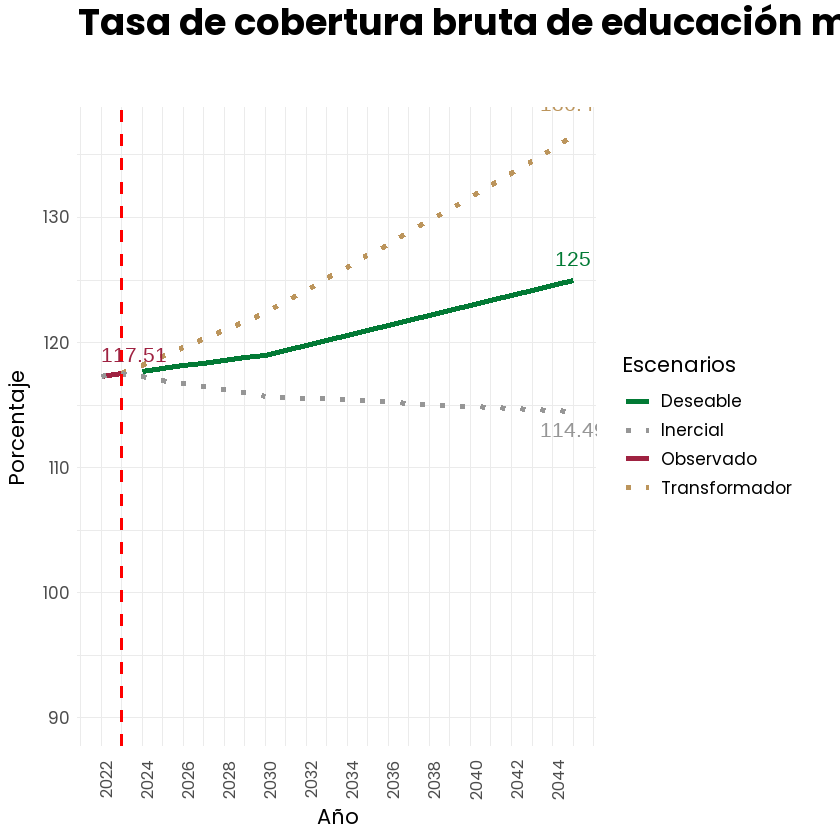

In [11]:
grafica_bonita(
  data = tasa_mediasup,
  x = "year",
  y = "estimado",
  titulo = "Tasa de cobertura bruta de educación media superior en la Ciudad de México
",
      ano_base = 2023,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2023,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(0.6, 1.5),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 90
)

ggsave("H:/Mi unidad/pgd/graficas/tasa_mediasup_estimada.png", width = 10, height = 7.5, dpi = 185, bg = "white")

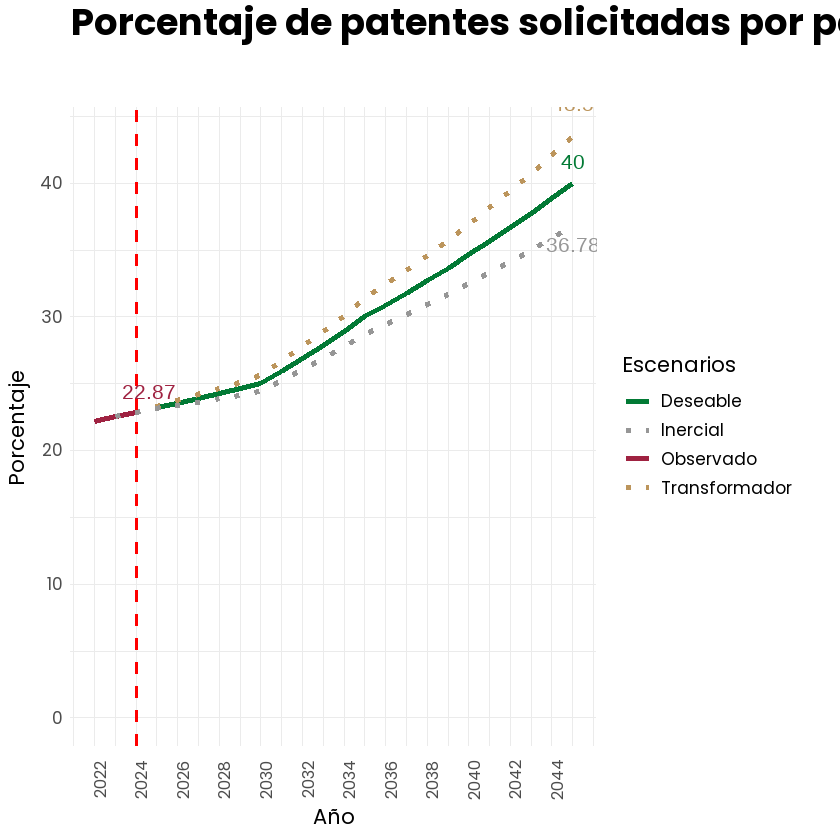

In [12]:
grafica_bonita(
  data = patentes,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de patentes solicitadas por personas mexicanas en Ciudad de México
",
        ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(0.6, 1.5),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/patentes_estimada.png", width = 10, height = 7.5, dpi = 185, bg = "white")

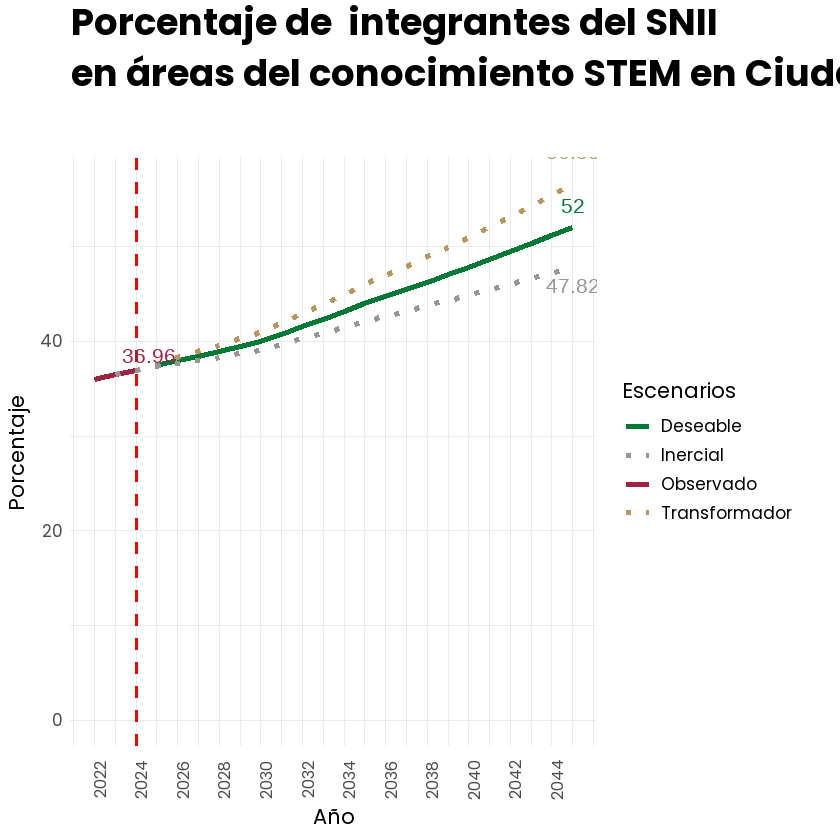

In [13]:
grafica_bonita(
  data = snii,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de  integrantes del SNII 
en áreas del conocimiento STEM en Ciudad de México
",
        ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(0.6, 1.5),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/snii_estimada.png", width = 10, height = 7.5, dpi = 185, bg = "white")